# Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Final Project -- DMA/Train.csv")

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Missing Values

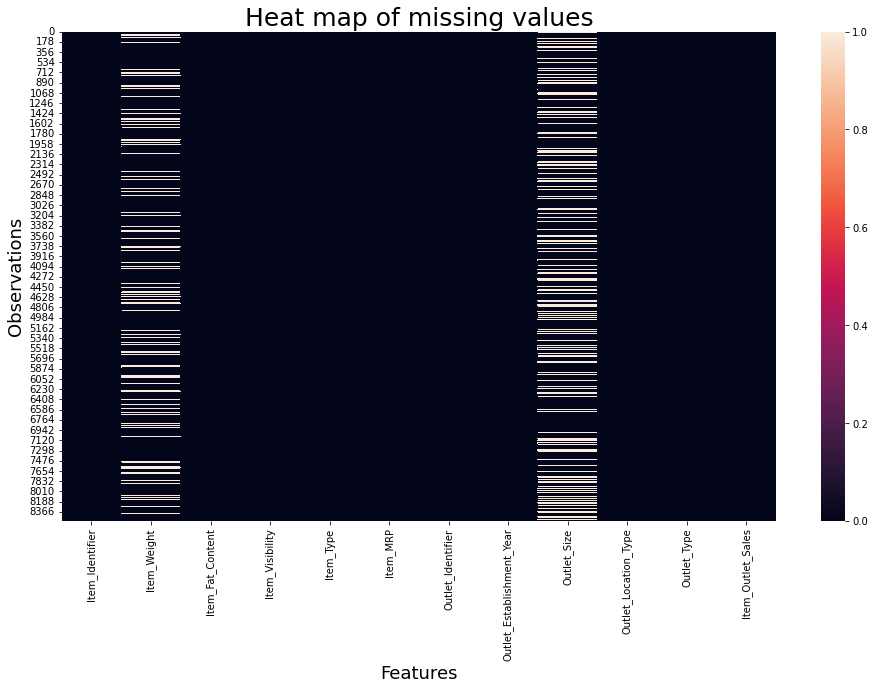

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isna())

plt.xlabel("Features",size=18)
plt.ylabel("Observations",size=18)
plt.title("Heat map of missing values",size=25)
plt.show()

In [8]:
missing_value_percentage=pd.DataFrame(df.isna().sum()*100/8523)

In [9]:
missing_value_percentage.reset_index(level=0,inplace=True)

In [10]:
missing_value_percentage.columns=["Features","Percentage_of_NA"]
missing_value_percentage

,Features,Percentage_of_NA
0,Item_Identifier,0.000000
1,Item_Weight,17.165317
2,Item_Fat_Content,0.000000
3,Item_Visibility,0.000000
4,Item_Type,0.000000
5,Item_MRP,0.000000
6,Outlet_Identifier,0.000000
7,Outlet_Establishment_Year,0.000000
8,Outlet_Size,28.276428
9,Outlet_Location_Type,0.000000


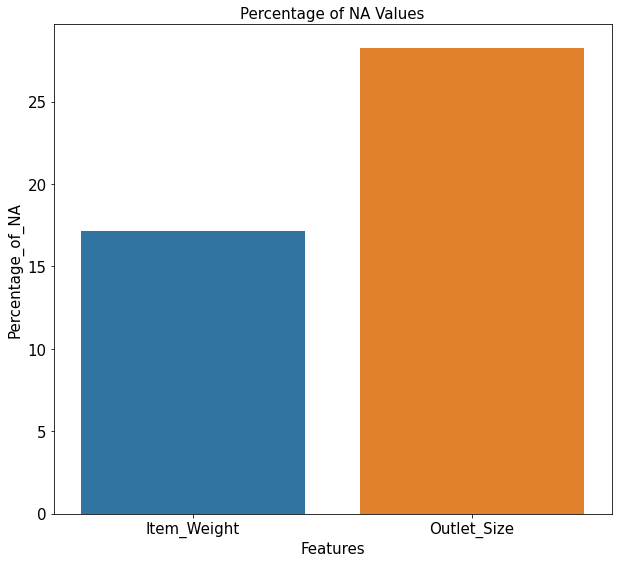

In [12]:
plt.figure(figsize=(10,9))
sns.barplot(x="Features",y="Percentage_of_NA",data=missing_value_percentage[missing_value_percentage["Percentage_of_NA"]>0])
plt.xlabel("Features",size=15)
plt.ylabel("Percentage_of_NA",size=15)
plt.title("Percentage of NA Values",size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [27]:
df1=df

Assuming Outlet type and Outlet Size are correlated based on domain knowledge. 
Lets see the corealtion by uing contigency matrix 

In [17]:
# Create a contingency table of Outlet Type and Outlet Size
contingency_table = pd.crosstab(df['Outlet_Type'], df['Outlet_Size'], margins=True)

# Print the contingency table
print(contingency_table)

Outlet_Size        High  Medium  Small   All
Outlet_Type                                 
Grocery Store         0       0    528   528
Supermarket Type1   932     930   1860  3722
Supermarket Type2     0     928      0   928
Supermarket Type3     0     935      0   935
All                 932    2793   2388  6113


In [26]:
# Calculate the percentage of each Outlet Type that falls into each Outlet Size category
outlet_type_size_pct = contingency_table.div(contingency_table['All'], axis=0).iloc[:-1, :-1]

# Print the percentage table
print(outlet_type_size_pct)

Outlet_Size            High    Medium     Small
Outlet_Type                                    
Grocery Store      0.000000  0.000000  1.000000
Supermarket Type1  0.250403  0.249866  0.499731
Supermarket Type2  0.000000  1.000000  0.000000
Supermarket Type3  0.000000  1.000000  0.000000


In [29]:
# Impute missing Outlet Size values based on the percentage table
for idx, row in df[df['Outlet_Size'].isnull()].iterrows():
    outlet_type = row['Outlet_Type']
    outlet_size = outlet_type_size_pct.loc[outlet_type].idxmax()
    df1.loc[idx, 'Outlet_Size'] = outlet_size

In [30]:
df1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [31]:
#Imputing mean in Item Weight
df1["Item_Weight"].fillna(df1["Item_Weight"].mean(),inplace=True)

In [32]:
df1.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Visualisations

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


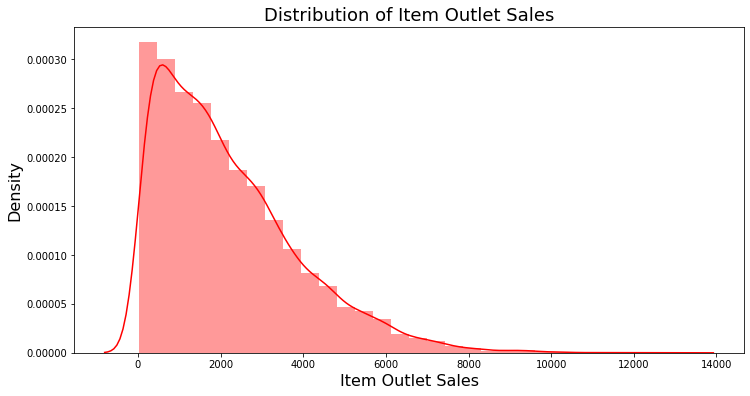

In [45]:
plt.figure(figsize=(12,6))
sns.distplot(df1['Item_Outlet_Sales'], color='red', bins=30, kde=True)
plt.xlabel('Item Outlet Sales',size=16)
plt.ylabel('Density',size=16)
plt.title('Distribution of Item Outlet Sales',size=18)
plt.show()

## Dealing with Categorical Variables


In [49]:
df1["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [50]:
df1.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [51]:
df1["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64